In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets,transforms
from torch.utils.data import DataLoader

import typing
import matplotlib.pyplot as plt

In [2]:
batch_size = 64
learning_rate = 0.001
num_epochs = 5

In [3]:
def get_device() -> str:
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_dataset(bach_size:int) -> typing.Tuple[DataLoader,DataLoader]:
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5,))
    ])

    train_dataset = datasets.MNIST(
        root="./data",
        train = True,
        transform=transform,
        download=True)
    
    test_dataset = datasets.MNIST(
        root="./data",
        train = False,
        transform=transform,
        download=True)
    
    train_loader = DataLoader(
        dataset = train_dataset,
        batch_size = bach_size,
        shuffle = True
    )

    test_loader = DataLoader(
        dataset = test_dataset,
        batch_size = bach_size,
        shuffle = True
    )

    return (train_loader,test_loader,train_dataset,test_dataset)

In [6]:
def get_random_image(dataloader:DataLoader)-> None:
    
    random_batch = torch.randint(0,len(dataloader),(1,)).item()
    print(random_batch)
    dataloader_iter = iter(dataloader)
    for _ in range(random_batch):
        next(dataloader_iter)
        
    images,labels = next(dataloader_iter)
    random_image = torch.randint(0,len(images),(1,)).item()
    image = images[random_image]
    label = labels[random_image]
    image = image * 0.5 + 0.5 
    image = image.permute(1, 2, 0)
    plt.imshow(image.squeeze(), cmap="gray")  
    plt.title(f"Etiqueta: {label.item()}")
    plt.axis("off")
    plt.show() 

In [7]:
device = get_device()
train_loader,test_loader = get_dataset(bach_size=batch_size)

507


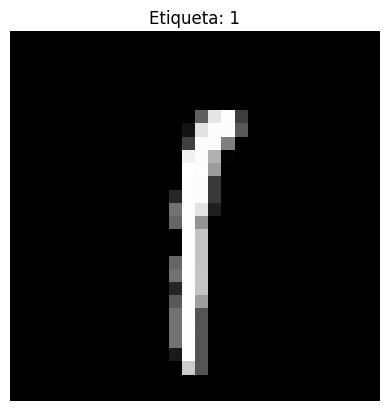

In [8]:
get_random_image(train_loader)

In [21]:
len(train_loader)

938

In [22]:
938*64

60032